In [1]:
import os
import re
from janome.tokenizer import Tokenizer
from nltk import ngrams, FreqDist, ConditionalFreqDist
from collections import Counter
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Noto Sans CJK JP"

In [2]:
with open('./data/shika.txt', 'r', encoding='utf_8') as f:
    data = [i.rstrip('\n') for i in f]

In [3]:
t = Tokenizer()
name = []
tokens = []

for line in data:
    tmp = []
    malist = t.tokenize(line)
    
    for w in malist:
        #base, part = w.base_form, w.part_of_speech
        base, part = w.surface, w.part_of_speech
        
        if '名詞' in part:
            tmp.append(base)
            tokens.append(base)
        
    name.append(tmp)

del tmp

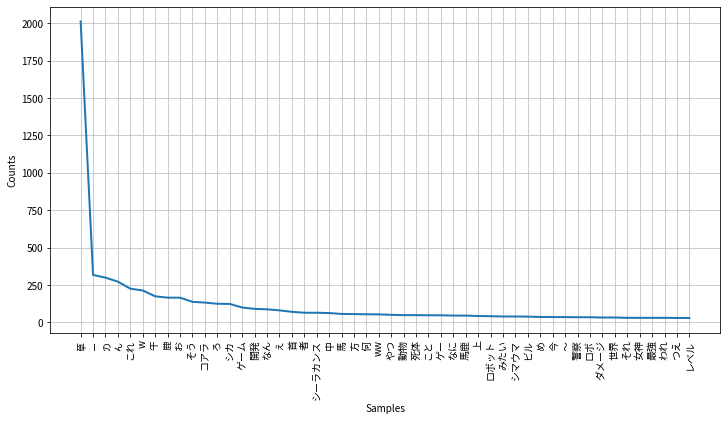

In [4]:
tokens_l = [w.lower() for w in tokens]
fd = FreqDist(tokens_l)
plt.figure(figsize=(12, 6))
fd.plot(50)
del tokens

In [5]:
bigram_list = []

for line in name:
    bigram = ngrams(line, 2)
    
    for i in bigram:
        bigram_list.append(i)

In [6]:
cfd = ConditionalFreqDist(bigram_list)

In [7]:
i = 0
for line in data:
    
    if re.findall('おつでろーん.*', line) != []:
        i += 1

print(i)

77
